In [1]:
import numpy as np
from graphviz import Digraph

from cdcm import *

# Coupled System

Let us consider how a coupled system can be modelled and simulated using CDCM. Here we consider a combined system consisting of 3 systems:

**system 0**: A clock system which keeps track of time. This system takes the time step $dt$ as input<br><br>

system 0: Clock system


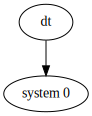

In [2]:
print('system 0: Clock system')
g = Digraph('clock system')
g.node('dt')
g.node('system 0')
g.edge('dt', 'system 0')
#g.render('Function', format='png')
g

**system 1**: A system with following variables.<br>

| Variable type | name | Unit | Description|
| :- | -: | :-: | :-: |
| State | $x_1$| m | state of system 1 |
| Parameter | $r_1$| m/s | rate parameter of system 1 |
| Parameter | $s_1$| m | Standard deviation of measurement noise|
| Parameter | $y_1$| m | Sensor measurement of system 1|

<br>system1 has following functions:<br>
- Transition function of $x_1$:
$f_1(x_1, r_1, dt) = x_1 + r_1 * dt$
- Emission function of $x_1$:
$y_1 = g_1(x_1, s_1) = x_1 + s_1 * guassian\ noise$


system 1


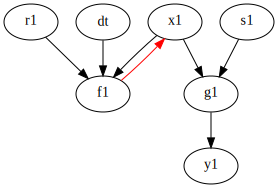

In [3]:
print('system 1')
from graphviz import Digraph
g = Digraph('system 1')
g.node('x1', label='<x<sub>1</sub>>')
g.node('r1', label='<r<sub>1</sub>>')
g.node('s1', label='<s<sub>1</sub>>')
g.node('dt')
g.node('y1', label='<y<sub>1</sub>>')
g.node('f1', label='<f<sub>1</sub>>')
g.node('g1', label='<g<sub>1</sub>>')
g.edge('x1', 'f1')
g.edge('r1', 'f1')
g.edge('dt', 'f1')
g.edge('f1', 'x1', color="red")
g.edge('x1', 'g1')
g.edge('s1', 'g1')
g.edge('g1', 'y1')
#g.render('Function', format='png')
g

**system 2**: A system with following variables.<br>

| Variable type | name | Unit | Description|
| :- | -: | :-: | :-: |
| State | $x_2$| m | state of system 2 |
| Parameter | $r_2$| m/s | rate parameter of system 2 |
| Parameter | c| 1/s | coupling coefficient |
| Parameter | $s_2$| m | Standard deviation of measurement noise|
| Parameter | $y_2$| m | Sensor measurement of system 2|

<br>system 2 has following functions:<br>
- Transition function of $x_2$:
$f_2(x_2, x_1, r_2, c, dt) = x_2 + r_2 * dt + c*x_1*dt$
- Emission function of $x_2$:
$y_2 = g_2(x_2, s_2) = x_2 + s_2 * guassian\ noise$

system 2


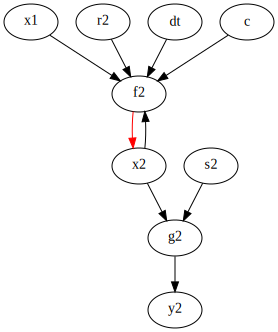

In [4]:
print('system 2')
from graphviz import Digraph
g = Digraph('system 1')
g.node('x1', label='<x<sub>1</sub>>')
g.node('x2', label='<x<sub>2</sub>>')
g.node('r2', label='<r<sub>2</sub>>')
g.node('s2', label='<s<sub>2</sub>>')
g.node('dt')
g.node('c')
g.node('y2', label='<y<sub>2</sub>>')
g.node('f2', label='<f<sub>2</sub>>')
g.node('g2', label='<g<sub>2</sub>>')
g.edge('x1', 'f2')
g.edge('x2', 'f2')
g.edge('r2', 'f2')
g.edge('dt', 'f2')
g.edge('c', 'f2')
g.edge('f2', 'x2', color="red")
g.edge('x2', 'g2')
g.edge('s2', 'g2')
g.edge('g2', 'y2')
#g.render('Function', format='png')
g

State of system 2 ```x2``` is dependent on system 1 state ```x1``` but not vice versa. Hence we are considering a one way coupled system here. Shown below is the DAG of coupled system.

Coupled system


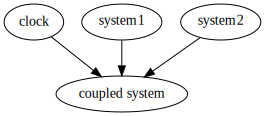

In [5]:
print('Coupled system')
from graphviz import Digraph
g = Digraph('system')
g.node('clock')
g.node('sys1', label='<system<sub>1</sub>>')
g.node('sys2', label='<system<sub>2</sub>>')
g.node('coupled system')
g.edge('clock', 'coupled system')
g.edge('sys1', 'coupled system')
g.edge('sys2', 'coupled system')
#g.render('Function', format='png')
g

## System creation - Manual method

The nodes are declared initially. System is created by manually adding the nodes to the system.

In [6]:
# ****************************
# System 0
# ****************************
clock = make_clock(0.1)

In [7]:
# ****************************
#       SYSTEM 1
# ****************************

x1 = make_node("S:x1:0.1:meters", description="State of sys1.")
r1 = make_node("P:r1:1.2:meters/second", description="Rate parameter for sys1.")
s1 = make_node(
    "P:s1:0.01:meters",
    description="Standard deviation of measurement noise"
)
y1 = make_node("V:y1", units="meters", description="Sensor measurement sys1.")

@make_function(x1)
def f1(x1=x1, r1=r1, dt=clock.dt):
    """Transition function for sys1."""
    return x1 + r1 * dt

@make_function(y1)
def g1(x1=x1, s1=s1):
    """Emission function for sys1."""
    return x1 + s1 * np.random.randn()

sys1 = System(
    name="sys1",
    nodes=[x1, r1, f1, s1, y1, g1]
)

In [8]:
# ****************************
#       SYSTEM 2
# ****************************

x2 = make_node("S:x2:0.3:meters")
r2 = make_node("P:r2:1.2:meters/second",)
c = make_node("P:c:0.1:1/second")
s2 = make_node(
    "P:s2:0.01:meters",
    description="Standard deviation of measurement noise"
)
y2 = make_node("V:y2", units="meters", description="Sensor measurement sys2.")


@make_function(x2)
def f2(x2=x2, x1=sys1.x1, r2=r2, c=c, dt=clock.dt):
    """Another simple system."""
    return x2 + r2 * dt + c * x1 * dt

@make_function(y2)
def g2(x2=x2, s2=s2):
    """Emission function for sys2."""
    return x2 + s2 * np.random.randn()

sys2 = System(
    name="sys2",
    nodes=[x2, r2, c, f2, s2, y2, g2]
)

In [9]:
# ****************************
#       COMBINED SYSTEM
# ****************************

sys = System(
    name="combined_system",
    nodes=[clock, sys1, sys2]
)

printing the system will output a dictionary of yaml format.

In [10]:
print(sys)

combined_system:
  description: ''
  owner: ''
  nodes:
    clock:
      description: A system that counts time.
      owner: combined_system
      nodes:
        dt:
          description: The timestep.
          owner: combined_system/clock
          parents: ()
          children: ('tick', 'combined_system/sys1/f1', 'combined_system/sys2/f2')
          value: 0.1
          units: seconds
          track: true
        t:
          description: The time.
          owner: combined_system/clock
          parents: ('tick',)
          children: ('tick',)
          value: 0.0
          units: seconds
          track: true
        tick:
          description: Moves time forward by `dt`.
          owner: combined_system/clock
          parents: ('t', 'dt')
          children: ('t',)
          func: !!python/name:cdcm.clock.tick ''
    sys1:
      description: ''
      owner: combined_system
      nodes:
        x1:
          description: State of sys1.
          owner: combined_system/sys1
 

### Simulating the system

In [11]:
for i in range(10):
    sys.forward()
    print(f"y1: {sys1.y1.value:1.2f}, y2: {sys2.y2.value:1.2f}")
    sys.transition()

y1: 0.10, y2: 0.30
y1: 0.21, y2: 0.42
y1: 0.34, y2: 0.54
y1: 0.45, y2: 0.67
y1: 0.58, y2: 0.80
y1: 0.69, y2: 0.93
y1: 0.82, y2: 1.04
y1: 0.93, y2: 1.16
y1: 1.06, y2: 1.32
y1: 1.19, y2: 1.43


## System creation - Using 'with' context

The nodes are created under the context of the system of which the nodes are part of. No need to manually add nodes to the system. Here we have wrapped nodes ``` s1, y1, g1``` in a separate system named ```sensor1```. Similarly we have wrapped nodes ``` s2, y2, g2``` in ```sensor2``` system.

In [16]:
with System(name="combined_system") as sys:
    # Make a clock
    clock = make_clock(0.1)

    # Make system 1
    with System(name="sys1") as sys1:
        x1 = State(name="x1", value=0.1, units="meters")
        r1 = Parameter(name="r1", value=1.2, units="meters/second",
            description="Rate parameter")

        @make_function(x1)
        def f1(x1=x1, r1=r1, dt=clock.dt):
            """Transition function for sys1."""
            return x1 + r1 * dt

        with System(name="sensor1") as sensor1:
            s1 = Parameter(name="s1", value=0.01, units="meters",
                description="Standard dev. measurement noise")
            y1 = Variable(name="y1", value=0.0, units="meters",
                description="Sensor output")
            @make_function(y1)
            def g1(x1=x1, s1=s1):
                return x1 + s1 * np.random.randn()

    # Make system 2
    with System(name="sys2") as sys2:
        x2 = State(name="x2", value=0.3, units="meters")
        r2 = Parameter(name="r2", value=1.2, units="meters")
        c = Parameter(name="c", value=0.1, units="1/second")

        @make_function(x2)
        def f2(x2=x2, x1=sys1.x1, r2=r2, c=c, dt=clock.dt):
            """Another simple system."""
            return x2 + r2 * dt + c * x1 * dt

        with System(name="sensor2") as sensor2:
            s2 = Parameter(name="s2", value=0.01, units="meters")
            y2 = Variable(name="y2", units="meters")
            @make_function(y2)
            def g2(x2=x2, s2=s2):
                return x2 + s2 * np.random.randn()

print(sys.sys1.sensor1.y1)

y1:
  description: Sensor output
  owner: combined_system/sys1/sensor1
  parents: ('g1',)
  children: ()
  value: 0.0
  units: meters
  track: true



In [19]:
for i in range(10):
    sys.forward()
    print(f"y1: {sys1.sensor1.y1.value:1.2f}, y2: {sys2.sensor2.y2.value:1.2f}")
    sys.transition()

y1: 2.50, y2: 2.94
y1: 2.60, y2: 3.09
y1: 2.73, y2: 3.23
y1: 2.85, y2: 3.40
y1: 2.96, y2: 3.54
y1: 3.09, y2: 3.69
y1: 3.23, y2: 3.84
y1: 3.34, y2: 3.98
y1: 3.45, y2: 4.13
y1: 3.58, y2: 4.30


As we can see, system creation using ```with``` context manager of python has made the code more compact and understandable.